In [1]:
import xarray as xr
import numpy as np

## Artificial data a stratified 3D Temperature

In [2]:
# x in [-1, 1], y in [0, 1], z in [0, -1000]
ds = xr.Dataset(
    {
        "x": (("x", ), np.linspace(-1, 1, 100)),
        "y": (("y", ), np.linspace(0, 1, 50)),
        "z": (("z", ), np.linspace(0, -1000, 40)),
    }
)

# a mixed-layer depth which is at least 30 meters and which varies 
# smoothly with x and y +/- small random distortions
ds["mld"] = (
    30 
    + 500 * (
        np.sin(np.pi * ds.x * np.random.uniform(0.95, 1.05, size=ds.x.data.shape))
        * np.cos(.5 * np.pi * ds.y * np.random.uniform(0.95, 1.05, size=ds.y.data.shape))
    ) ** 2
)

# Vertical temperature profiles exponentially decaying
# using the MLD as e-folding scale
ds["temp"] = (
    15
    + 5 * np.exp(ds.z / ds.mld)
)

ds

<xarray.Dataset>
Dimensions:  (x: 100, y: 50, z: 40)
Coordinates:
  * x        (x) float64 -1.0 -0.9798 -0.9596 -0.9394 ... 0.9596 0.9798 1.0
  * y        (y) float64 0.0 0.02041 0.04082 0.06122 ... 0.9592 0.9796 1.0
  * z        (z) float64 0.0 -25.64 -51.28 -76.92 ... -948.7 -974.4 -1e+03
Data variables:
    mld      (x, y) float64 38.4 38.39 38.37 38.33 ... 30.04 30.0 30.06 30.0
    temp     (z, x, y) float64 20.0 20.0 20.0 20.0 20.0 ... 15.0 15.0 15.0 15.0

## Vis temperature

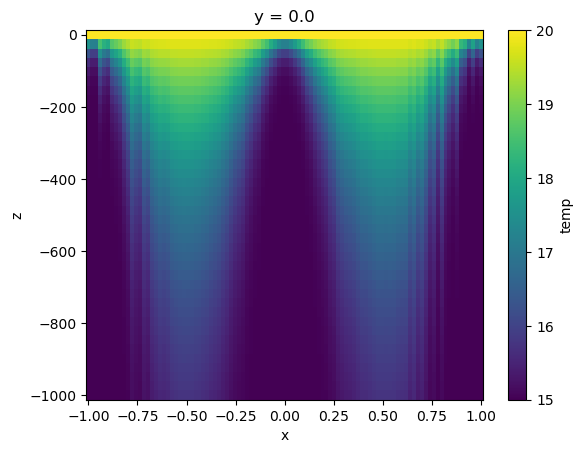

In [3]:
ds.temp.sel(y=0, method="nearest").plot()

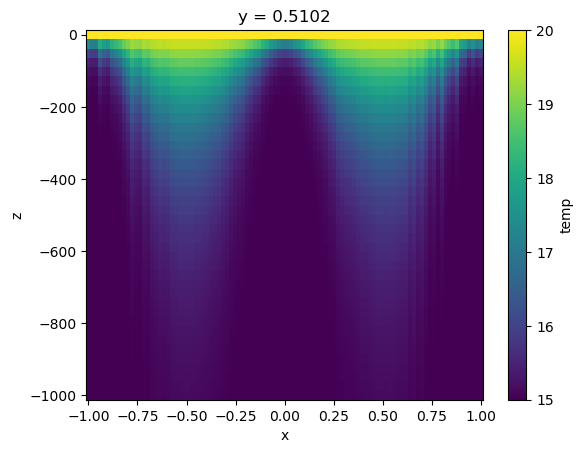

In [4]:
ds.temp.sel(y=0.5, method="nearest").plot()

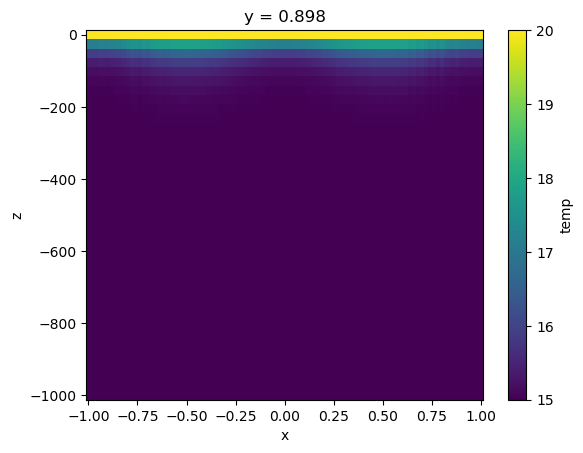

In [5]:
ds.temp.sel(y=0.9, method="nearest").plot()

## Finding a layer of a given temperature

In [6]:
temp_of_interest = 17.0

<xarray.DataArray 'z' (x: 100, y: 50)>
array([[-51.28205128, -51.28205128, -51.28205128, ..., -51.28205128,
        -51.28205128, -51.28205128],
       [-51.28205128, -51.28205128, -51.28205128, ..., -51.28205128,
        -51.28205128, -51.28205128],
       [-51.28205128, -51.28205128, -51.28205128, ..., -51.28205128,
        -51.28205128, -51.28205128],
       ...,
       [-51.28205128, -51.28205128, -51.28205128, ..., -51.28205128,
        -51.28205128, -51.28205128],
       [-51.28205128, -51.28205128, -51.28205128, ..., -51.28205128,
        -51.28205128, -51.28205128],
       [-51.28205128, -51.28205128, -51.28205128, ..., -51.28205128,
        -51.28205128, -51.28205128]])
Coordinates:
  * x        (x) float64 -1.0 -0.9798 -0.9596 -0.9394 ... 0.9596 0.9798 1.0
  * y        (y) float64 0.0 0.02041 0.04082 0.06122 ... 0.9592 0.9796 1.0

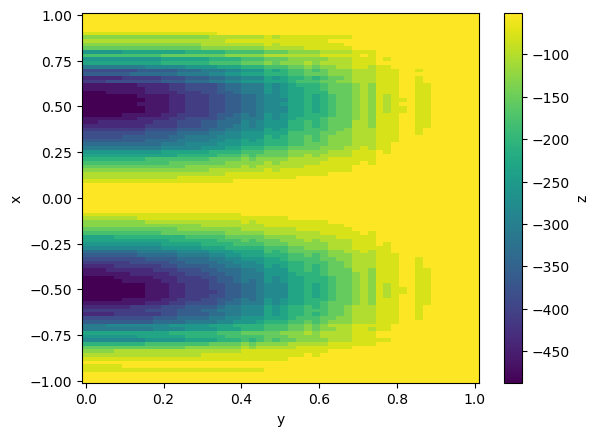

In [7]:
depth_of_interest = (ds.temp > temp_of_interest).idxmin("z")
display(depth_of_interest)
depth_of_interest.plot()

## Check if the temperature in the layer we found is actually close to the desired one

<xarray.DataArray 'temp' (x: 100, y: 50)>
array([[16.31530623, 16.31493584, 16.31365187, ..., 15.90487783,
        15.90881829, 15.90513837],
       [15.92626028, 15.92623971, 15.92616843, ..., 15.90487056,
        15.90506557, 15.90488345],
       [15.92002496, 15.92001038, 15.91995984, ..., 15.90487044,
        15.90500853, 15.90487957],
       ...,
       [16.63643282, 16.63582221, 16.63370486, ..., 15.90488467,
        15.91234478, 15.90537808],
       [15.94081913, 15.94078461, 15.94066499, ..., 15.90487081,
        15.90519904, 15.90489251],
       [16.25478279, 16.25446305, 16.25335474, ..., 15.90487664,
        15.90820366, 15.9050966 ]])
Coordinates:
  * x        (x) float64 -1.0 -0.9798 -0.9596 -0.9394 ... 0.9596 0.9798 1.0
  * y        (y) float64 0.0 0.02041 0.04082 0.06122 ... 0.9592 0.9796 1.0
    z        (x, y) float64 -51.28 -51.28 -51.28 -51.28 ... -51.28 -51.28 -51.28

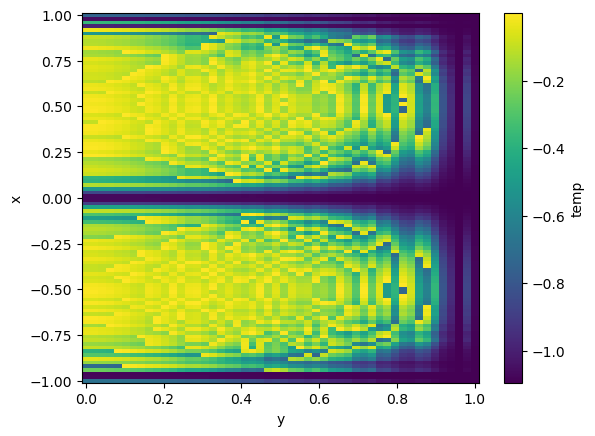

In [8]:
temp_at_depth_of_interest = ds.temp.sel(z=depth_of_interest)
display(temp_at_depth_of_interest)
(temp_at_depth_of_interest - temp_of_interest).plot()